In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Will try and get an mjj distribution that looks something like this:

<img src="Capture.PNG">

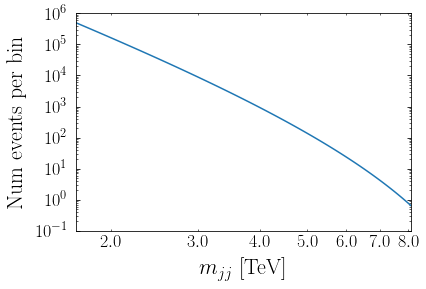

In [2]:
def dNbydM(m,p0,p1,p2):
    return p0*(1-(m/13))**p1/(m/13)**p2

p0 = 0.5*10**1
p1 = 5.
p2 = 6.
x = np.arange(1.7,8.11,0.1)
y = [dNbydM(m,p0,p1,p2) for m in x]
plt.plot(x,y)
plt.semilogy()
plt.semilogx()
plt.xlabel(r"$m_{jj}$  [TeV]")
plt.ylabel("Num events per bin")
plt.xlim([1.7,8.1])
plt.ylim([10**-1,10**6])
ax=plt.gca()
ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.yticks(np.logspace(-1,6,8))
plt.show()

Define bins to be the same (at least roughly) as ATLAS dijets, then restrict to narrower mass range.

In [3]:
bin_boundaries = np.logspace(np.log10(1.7),np.log10(8.1),67)
bin_boundaries = bin_boundaries[7:-20]
bin_midpoints = np.array([(bin_boundaries[i+1] + bin_boundaries[i])/2 for i in range(len(bin_boundaries)-1)])
bin_widths = np.array([bin_boundaries[i+1] - bin_boundaries[i] for i in range(len(bin_boundaries)-1)])

Generate bg events

In [29]:
bg_bincounts = [np.random.poisson(dNbydM(m,p0,p1,p2)) for m in bin_midpoints]
ndim=2
bgevents = [np.clip(np.random.normal(0,1,(bincount,ndim)),-4,4) for bincount in bg_bincounts]

Generate signal rates as gaussian in mJJ

In [30]:
signal_distribution = np.random.normal(2.97,0.06,150)
signal_bincounts = np.histogram(signal_distribution,bins=bin_boundaries)[0]
signal_bincounts

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 35, 65,
       38,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

Check S/B and S/sqrt(B) around signal peak

In [31]:
print("Signal events =",signal_bincounts[14:19])
print("BG events =",bg_bincounts[14:19])
print("S/sqrt(B) =",signal_bincounts[14:19]/np.sqrt(bg_bincounts[14:19]))
print("S/B =",signal_bincounts[14:19]/bg_bincounts[14:19])
print("S/sqrt(B) in signal region =",np.sum(signal_bincounts[15:18])/np.sqrt(np.sum(bg_bincounts[15:18])))

Signal events = [ 5 35 65 38  7]
BG events = [13789, 11817, 9791, 8098, 6815]
S/sqrt(B) = [0.0425798  0.32196927 0.65690086 0.42227436 0.084794  ]
S/B = [0.00036261 0.00296183 0.00663875 0.00469252 0.00102715]
S/sqrt(B) in signal region = 0.8006763450819709


Generate auxilliary variables for signal events. A narrow Gaussian in a moderately populated region of bg.

In [32]:
signal_center = np.ones(ndim)*1.5
signal_variances = np.ones(ndim)*0.08**2
signal_cov = np.diag(signal_variances)
signalevents = [np.clip(np.random.multivariate_normal(signal_center,
                                              signal_cov,
                                              bincount),-4,4)
                for bincount in signal_bincounts]

bg_plus_signal_binned = [np.random.permutation(np.append(signalevents[i],bgevents[i],axis=0)) for i in range(len(signalevents))]

Look at signal and bg auxilliary distributions

Signal + bg:


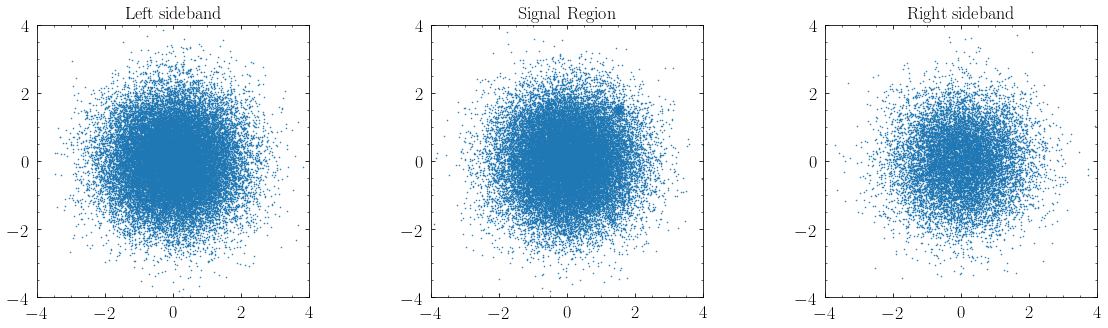

Signal highlighted:


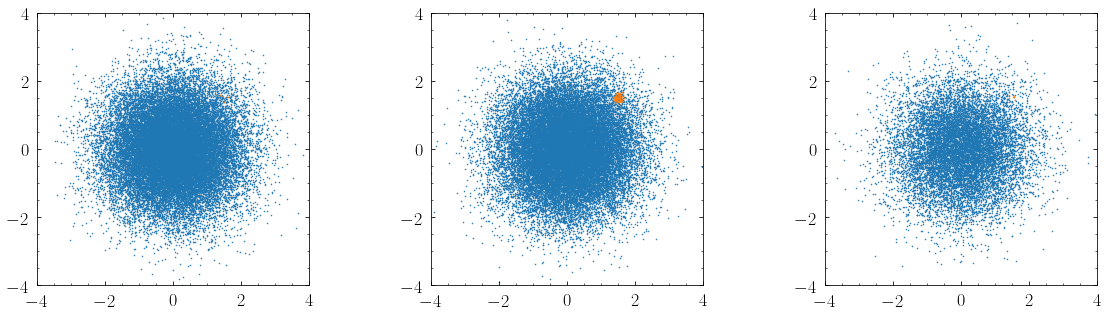

In [33]:
print("Signal + bg:")
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
for bin_i in [13,14]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Left sideband")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 2)
for bin_i in [15,16,17]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Signal Region")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 3)    
for bin_i in [18,19]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Right sideband")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

print("Signal highlighted:")
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
for bin_i in [13,14]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 2)
for bin_i in [15,16,17]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 3)    
for bin_i in [18,19]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

Most of the next two cells can be removed, I just need to figure out which bits need to be kept

In [34]:
from __future__ import print_function
#import os
import gc
import sys
import numpy as np
import numpy.random as rand
import math
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import stats
import keras as keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
#import pickle as pickle
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import time
import glob
import numpy.ma as ma
from keras import backend as K
K.set_session(sess)

from cwola_utils_copy import AddPredictionsToScatter_nestedcrossval
from cwola_utils_copy import model_ensemble
from cwola_utils_copy import check_eff
from cwola_utils_copy import print_scatter_checkpoint
from cwola_utils_copy import get_p_value

/home/Jack/.virtualenvs/Keras/lib/python3.4/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [35]:
myargs={}

if '-o' not in myargs:
    print("Setting default output name '-o': '~/model'")
    myargs['-o'] = "~/model"
if '-in' not in myargs:
    print("Setting default input directory to '/data1/users/jcollins/'")
    myargs['-in'] = '/data1/users/jcollins/'
if '-bin' not in myargs:
    myargs['-bin'] = 7
    print("Setting default bin '-bin':", myargs['-bin'])
else:
    myargs['-bin'] = int(myargs['-bin'])
if '-it' not in myargs:
    myargs['-it'] = 3
    print("Setting default  '-it':", myargs['-it'])
else:
    myargs['-it'] = int(myargs['-it'])
    
if '-kfold' not in myargs:
    myargs['-kfold'] = 5
    print("Setting default  '-kfold':",myargs['-kfold'])
else:
    myargs['-kfold'] = int(myargs['-kfold'])
    
if '-signal' not in myargs:
    myargs['-signal'] = 1
    print("Setting default  '-signal':",myargs['-signal'])
else:
    myargs['-signal'] = int(myargs['-signal'])
    
if '-sigevnts' not in myargs:
    myargs['-sigevnts'] = 1125
    print("Setting default  '-sigevnts':",myargs['-sigevnts'])
else:
    myargs['-sigevnts'] = int(myargs['-sigevnts'])
if '-bgevnts' not in myargs:
    myargs['-bgevnts'] = 553388
    print("Setting default  '-bgevnts':", myargs['-bgevnts'])
else:
    myargs['-bgevnts'] = int(myargs['-bgevnts'])
if '-bgoffset' not in myargs:
    myargs['-bgoffset'] = 0
    print("Setting default  '-bgoffset':", myargs['-bgoffset'])
else:
    myargs['-bgoffset'] = int(myargs['-bgoffset'])

if '-batchsize' not in myargs:
    myargs['-batchsize'] = 5000
    print("Setting default  '-batchsize':", myargs['-batchsize'])
else:
    myargs['-batchsize'] = int(myargs['-batchsize'])
if '-patience' not in myargs:
    myargs['-patience'] = 250
    print("Setting default  '-patience':", myargs['-patience'])
else:
    myargs['-patience'] = int(myargs['-patience'])
if '-checkeff' not in myargs:
    myargs['-checkeff'] = 0.01
    print("Setting default  '-checkeff':", myargs['-checkeff'])
else:
    myargs['-checkeff'] = float(myargs['-checkeff'])

if '-loadonly' not in myargs:
    myargs['-loadonly'] = 0
    print("Setting default  '-loadonly':", myargs['-loadonly'])
else:
    myargs['-loadonly'] = float(myargs['-loadonly'])
if '-trainonly' not in myargs:
    myargs['-trainonly'] = 0
    print("Setting default  '-trainonly':", myargs['-trainonly'])
else:
    myargs['-trainonly'] = int(myargs['-trainonly'])

    
if '-startk' not in myargs:
    myargs['-startk'] = 0
    print("Setting default  '-startk':", myargs['-startk'])
else:
    myargs['-startk'] = int(myargs['-startk'])
if '-startl' not in myargs:
    myargs['-startl'] = 0
    print("Setting default  '-startl':", myargs['-startl'])
else:
    myargs['-startl'] = int(myargs['-startl'])
if '-endk' not in myargs:
    myargs['-endk'] = 0
    print("Setting default  '-endk':", myargs['-endk'])
else:
    myargs['-endk'] = int(myargs['-endk'])
if '-endl' not in myargs:
    myargs['-endl'] = 0
    print("Setting default  '-endl':", myargs['-endl'])
else:
    myargs['-endl'] = int(myargs['-endl'])

Setting default output name '-o': '~/model'
Setting default input directory to '/data1/users/jcollins/'
Setting default bin '-bin': 7
Setting default  '-it': 3
Setting default  '-kfold': 5
Setting default  '-signal': 1
Setting default  '-sigevnts': 1125
Setting default  '-bgevnts': 553388
Setting default  '-bgoffset': 0
Setting default  '-batchsize': 5000
Setting default  '-patience': 250
Setting default  '-checkeff': 0.01
Setting default  '-loadonly': 0
Setting default  '-trainonly': 0
Setting default  '-startk': 0
Setting default  '-startl': 0
Setting default  '-endk': 0
Setting default  '-endl': 0


Do a single training run and show how the NN evolves during training

 k = 0 l = 1
Now training model  1  of  1


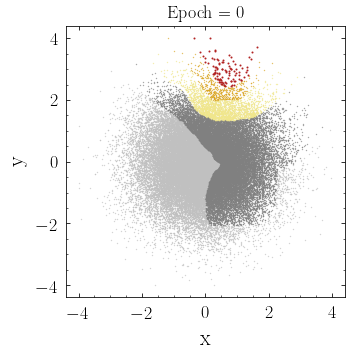

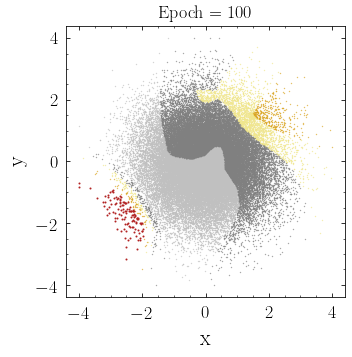

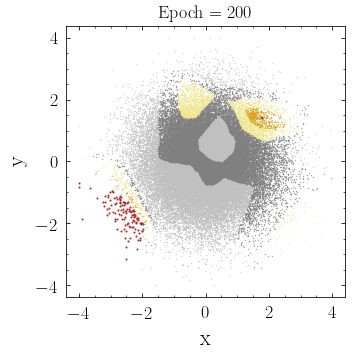

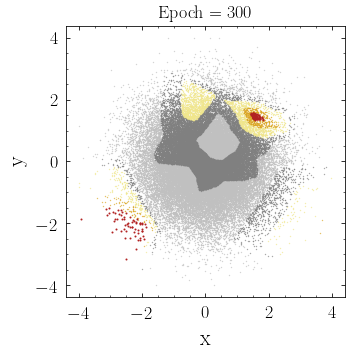

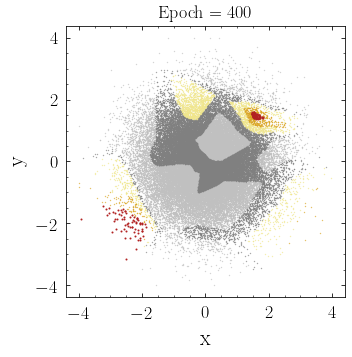

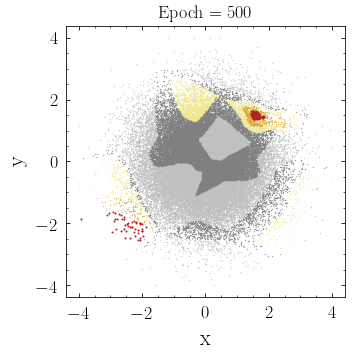

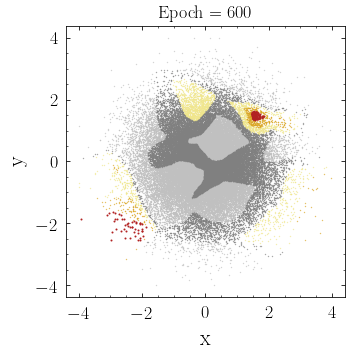

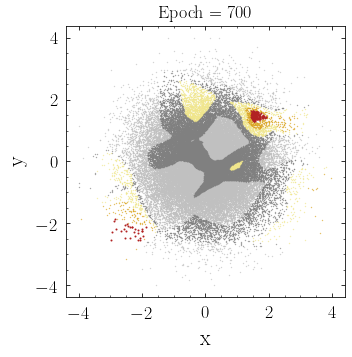

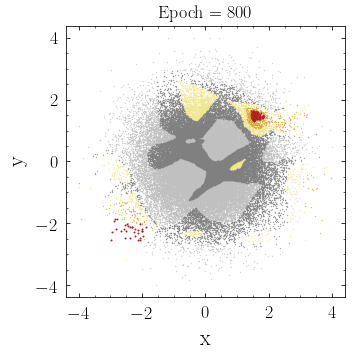

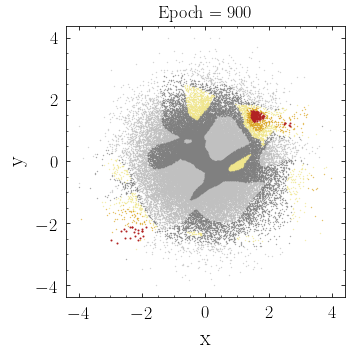

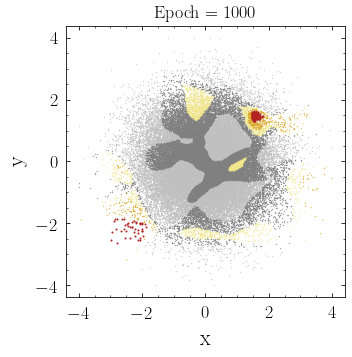

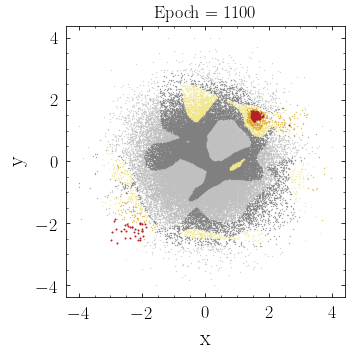

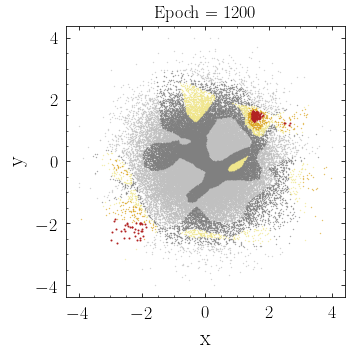

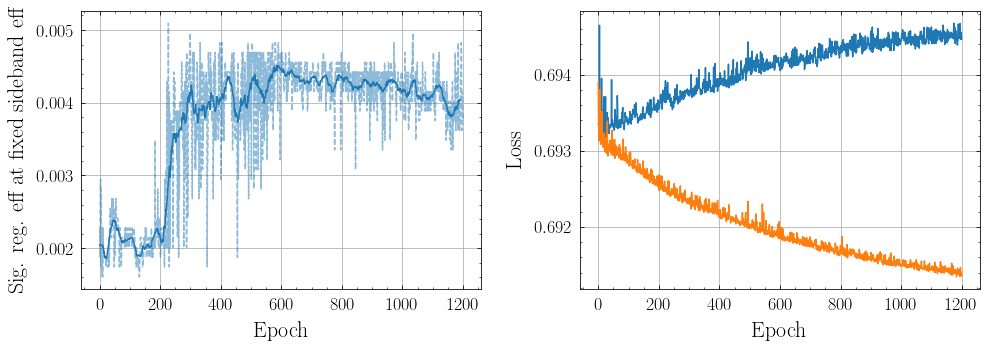

Selected Model:


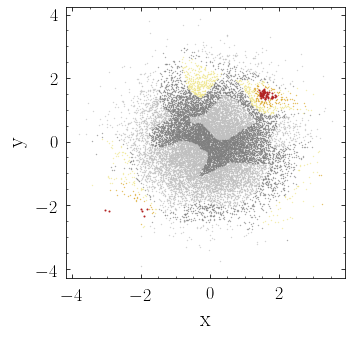

Elapsed Time =  402.77340030670166


In [36]:
output_prefix = 'testing'
myargs['-kfold']=4
kfolds = 4
myargs['-checkeff']=0.002
eff_for_thresh=0.002
myargs['-patience'] = 600
ntries = 1

bin_i=16
axes_list=[[0,1]]
axes_labels=[['x','y']]
preprocess=None
numvars=2
batch_size=2000

rates = np.array([0.5,0.95,0.99,0.998]),
colors=['silver','grey','khaki','goldenrod','firebrick']

times = list()


myargs['-checkeff']

model_utils = model_ensemble(bg_plus_signal_binned, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = eff_for_thresh)

i=0
k=0
l=1

print(" k =", k, "l =", l)
#Naming convention for model files.
checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
start = time.time()

data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

print("Now training model ", i + 1, " of ", ntries)

K.clear_session()
#Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

#Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
my_check_eff = check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = myargs['-patience'],
                         min_epoch=50, batch_size=batch_size,
                         plot_period=50,eff_rate=myargs['-checkeff'],
                         plotmode="print",avg_length=20)
#Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                    axes_list = axes_list,
                                    axes_labels = axes_labels,
                                    period=100,
                                    training_data=np.append(data_train,data_valid,axis=0),
                                    training_labels=np.append(labels_train,labels_valid,axis=0),
                                    preprocess=preprocess,
                                   rates=rates,
                                   colors=colors,
                                   mode = "show")

mycallbacks=[my_print,
    my_check_eff]

#Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
#However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
model = Sequential()
model.add(Dense(64, input_dim=numvars,use_bias=True,
                #activation='relu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
model.add(keras.layers.LeakyReLU(alpha=0.01))
#model.add(Activation('tanh'))
#model.add(Dropout(0.1))
model.add(Dense(64, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(32, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(16, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(8, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=myoptimizer,
              loss='binary_crossentropy')

model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                       validation_data=(data_valid, labels_valid, weights_valid),
                       callbacks=mycallbacks,verbose=0,
                       sample_weight = weights_train)

del model
K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


model = keras.models.load_model(checkpoint_name + "_best.h5")
model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
plt.close('all')

print("Selected Model:")
model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                            rates=rates,
                                                            colors=colors)

for i in range(5):
    gc.collect()
end = time.time()

times.append(end-start)
print("Elapsed Time = ", times[-1])
sys.stdout.flush()

Run full cross validation procedure, show trained and ensemble classifiers. For each individual classifier, the selection is shown on all training and validation data for that k-fold. After training all the classifiers in an ensemble for a k-fold, the selection of the ensemble classifier is shown on the test k-fold itself.

Starting kfold 0 of 3
Starting lfold 1 of 3
 k = 0 l = 1
Now training model  1  of  1


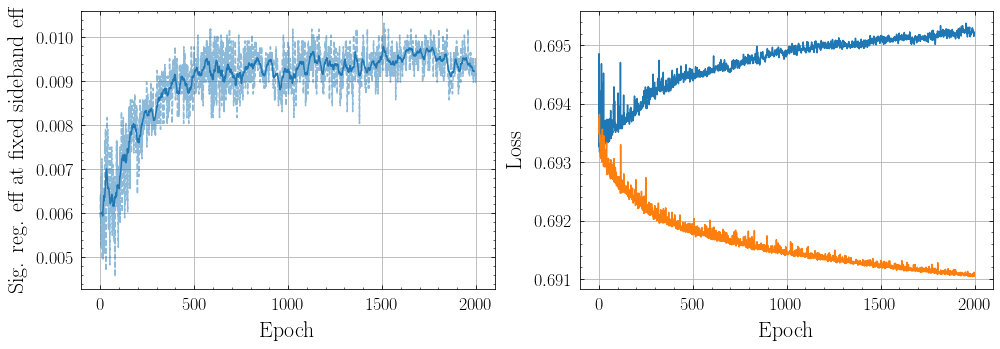

Selected Model:


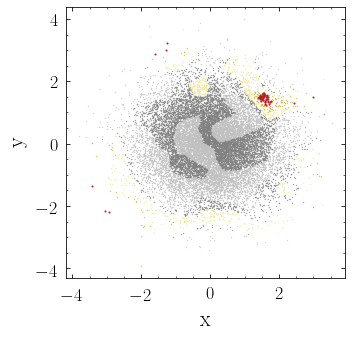

Elapsed Time =  663.4009931087494
Starting lfold 2 of 3
 k = 0 l = 2
Now training model  1  of  1


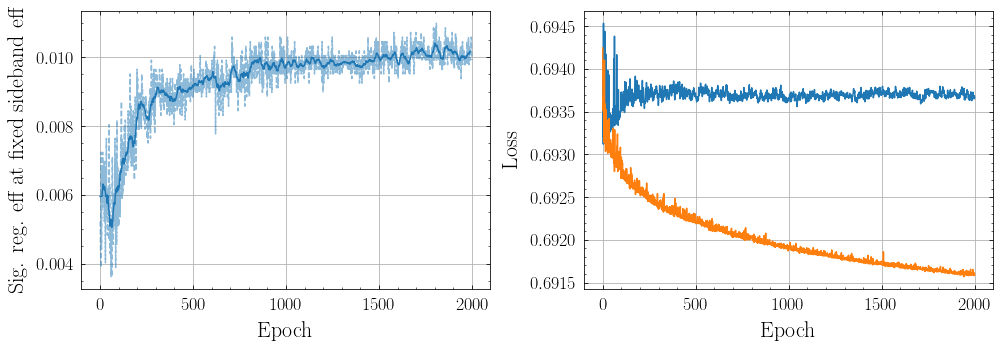

Selected Model:


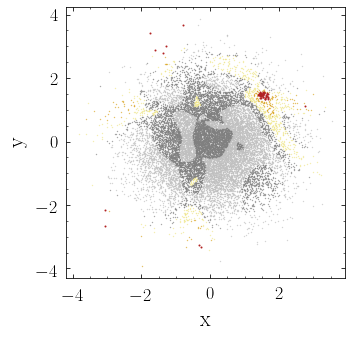

Elapsed Time =  749.1157011985779
Starting lfold 3 of 3
 k = 0 l = 3
Now training model  1  of  1


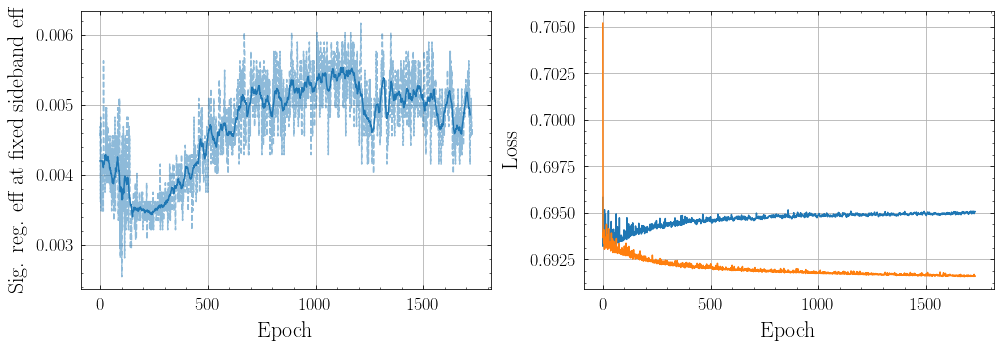

Selected Model:


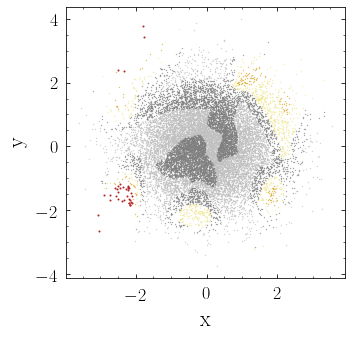

Elapsed Time =  632.6778378486633
Bin =  16
aucs valid:  [[[0.4968972983193186], [0.5037877421497183], [0.49520898096947535]], [[], [], []], [[], [], []], [[], [], []]]
Effs valid:  [[[0.009784211231738338], [0.010186302104275513], [0.005495241924674987]], [[], [], []], [[], [], []], [[], [], []]]
aucs train:  [[[0.5267240685050738], [0.5227152281980528], [0.5260916899518304]], [[], [], []], [[], [], []], [[], [], []]]
Effs train:  [[[0.009851226377161293], [0.009047044632086831], [0.006969575123978]], [[], [], []], [[], [], []], [[], [], []]]


Ensemble model for k = 0


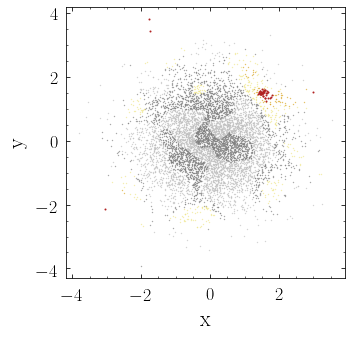

Starting kfold 1 of 3
Starting lfold 0 of 3
 k = 1 l = 0
Now training model  1  of  1


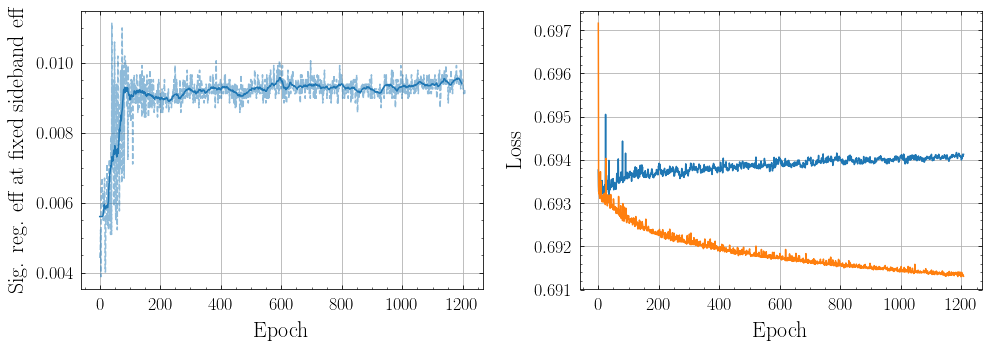

Selected Model:


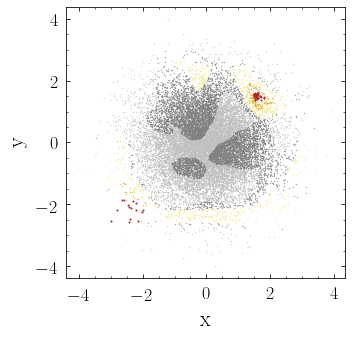

Elapsed Time =  452.0784673690796
Starting lfold 2 of 3
 k = 1 l = 2
Now training model  1  of  1


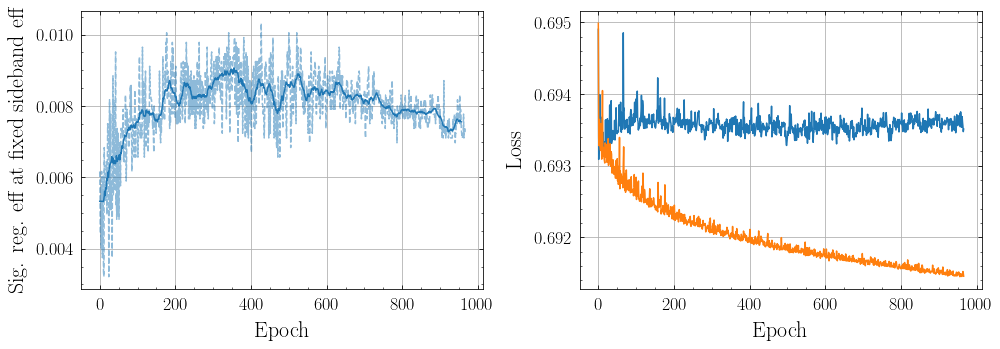

Selected Model:


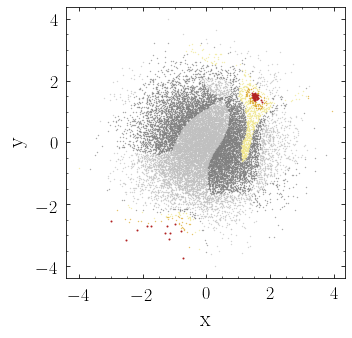

Elapsed Time =  341.7340853214264
Starting lfold 3 of 3
 k = 1 l = 3
Now training model  1  of  1


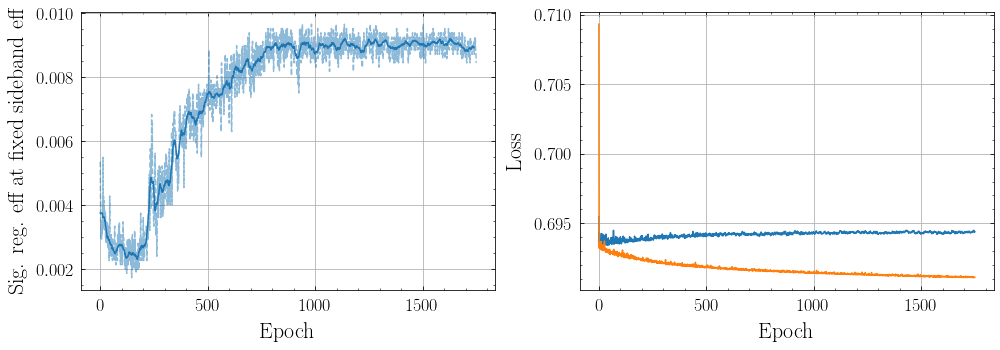

Selected Model:


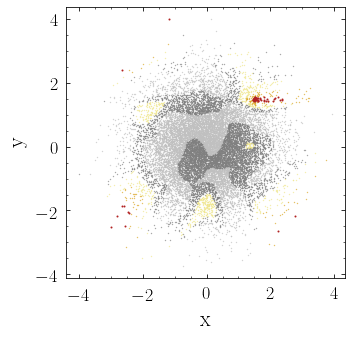

Elapsed Time =  670.4766602516174
Bin =  16
aucs valid:  [[[0.4968972983193186], [0.5037877421497183], [0.49520898096947535]], [[0.49574398999428715], [0.5034262170559178], [0.4998338261280743]], [[], [], []], [[], [], []]]
Effs valid:  [[[0.009784211231738338], [0.010186302104275513], [0.005495241924674987]], [[0.009918241522584137], [0.00965018094089265], [0.009114059777509675]], [[], [], []], [[], [], []]]
aucs train:  [[[0.5267240685050738], [0.5227152281980528], [0.5260916899518304]], [[0.5220070652003269], [0.5167375531961662], [0.5279203173031644]], [[], [], []], [[], [], []]]
Effs train:  [[[0.009851226377161293], [0.009047044632086831], [0.006969575123978]], [[0.011325559576464306], [0.0087119689049725], [0.008778984050395344]], [[], [], []], [[], [], []]]


Ensemble model for k = 1


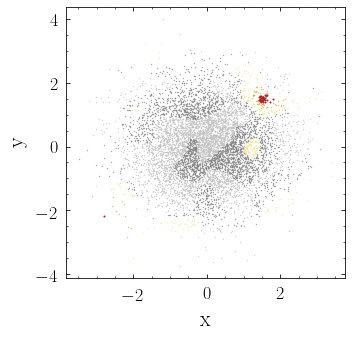

Starting kfold 2 of 3
Starting lfold 0 of 3
 k = 2 l = 0
Now training model  1  of  1


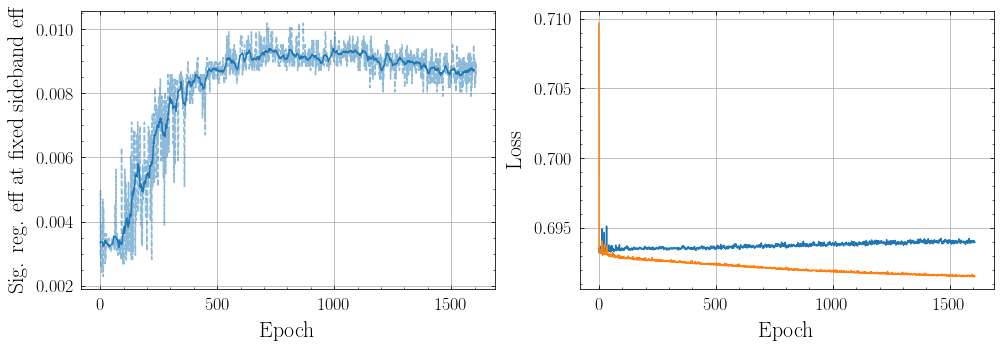

Selected Model:


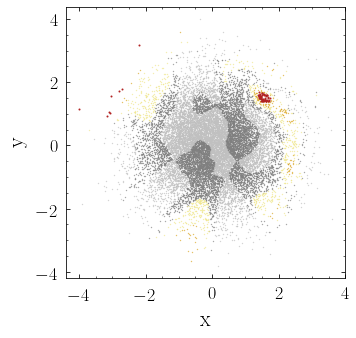

Elapsed Time =  35615.22159695625
Bin =  16
aucs valid:  [[[0.4968972983193186], [0.5037877421497183], [0.49520898096947535]], [[0.49574398999428715], [0.5034262170559178], [0.4998338261280743]], [[0.49933110893970445], [0.4922249703724505], [0.4963457183647468]], [[], [], []]]
Effs valid:  [[[0.009784211231738338], [0.010186302104275513], [0.005495241924674987]], [[0.009918241522584137], [0.00965018094089265], [0.009114059777509675]], [[0.011258544431041462], [0.009114059777509675], [0.009248090068355475]], [[], [], []]]
aucs train:  [[[0.5267240685050738], [0.5227152281980528], [0.5260916899518304]], [[0.5220070652003269], [0.5167375531961662], [0.5279203173031644]], [[0.5127028274506712], [0.5182765811678677], [0.5195843854270068]], [[], [], []]]
Effs train:  [[[0.009851226377161293], [0.009047044632086831], [0.006969575123978]], [[0.011325559576464306], [0.0087119689049725], [0.008778984050395344]], [[0.009851226377161293], [0.009047044632086831], [0.010119286958852669]], [[], [], 

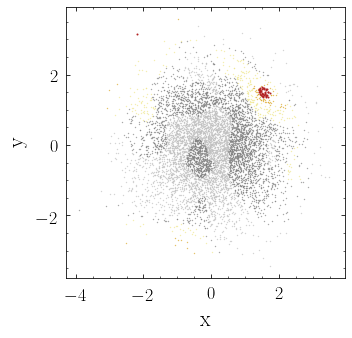

Starting kfold 3 of 3
Starting lfold 0 of 3
 k = 3 l = 0
Now training model  1  of  1


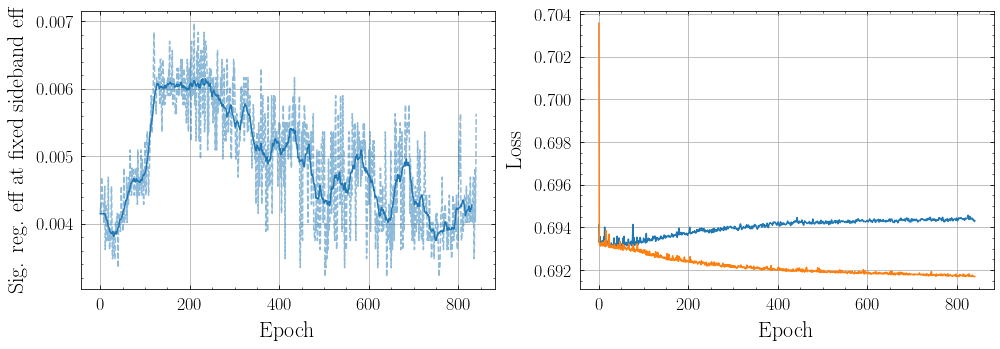

Selected Model:


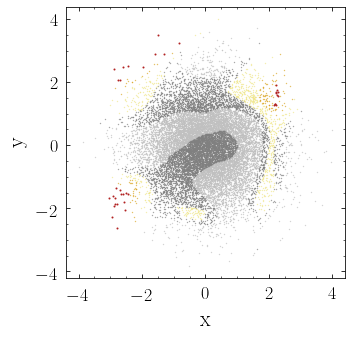

Elapsed Time =  592.3690106868744
Starting lfold 1 of 3
 k = 3 l = 1
Now training model  1  of  1


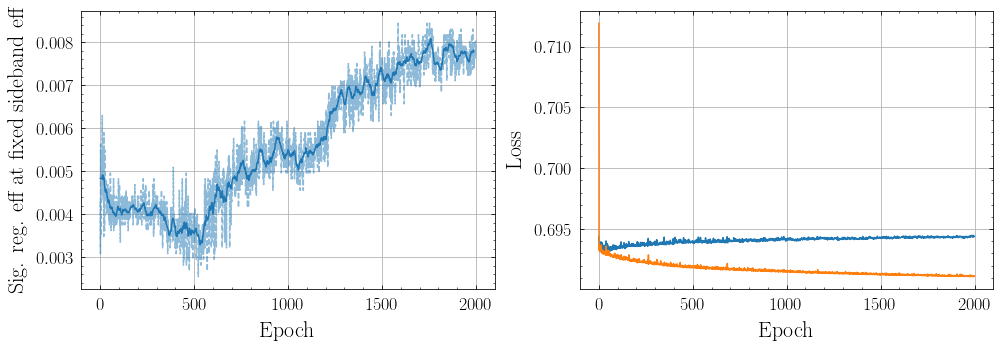

Selected Model:


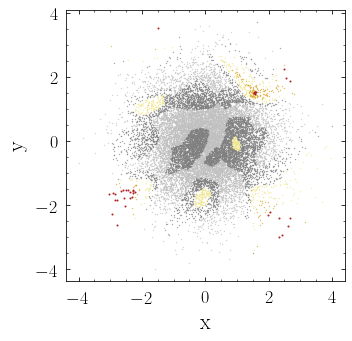

Elapsed Time =  1238.4206659793854
Starting lfold 2 of 3
 k = 3 l = 2
Now training model  1  of  1


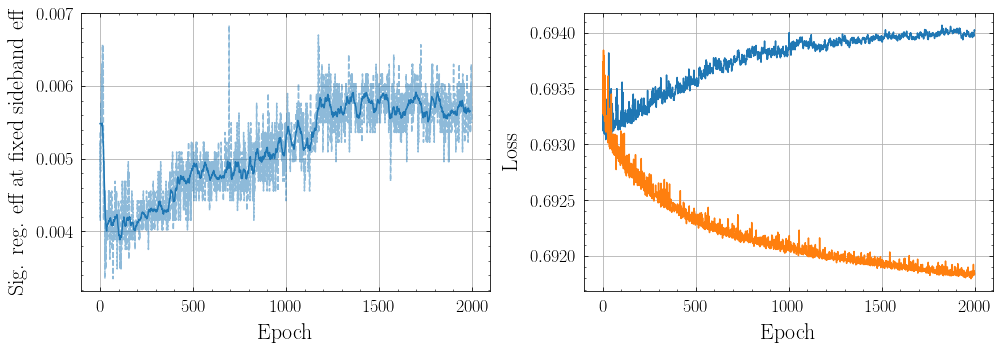

Selected Model:


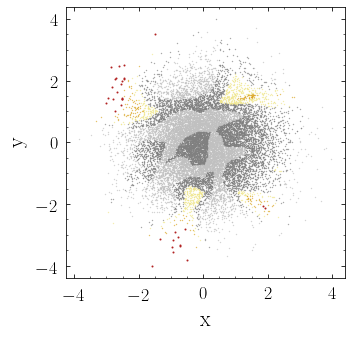

Elapsed Time =  1195.9070854187012
Bin =  16
aucs valid:  [[[0.4968972983193186], [0.5037877421497183], [0.49520898096947535]], [[0.49574398999428715], [0.5034262170559178], [0.4998338261280743]], [[0.49933110893970445], [0.4922249703724505], [0.4963457183647468]], [[0.499034639078761], [0.5048151037267932], [0.5051364707916184]]]
Effs valid:  [[[0.009784211231738338], [0.010186302104275513], [0.005495241924674987]], [[0.009918241522584137], [0.00965018094089265], [0.009114059777509675]], [[0.011258544431041462], [0.009114059777509675], [0.009248090068355475]], [[0.005629272215520675], [0.008309878032435325], [0.0058973327972121625]]]
aucs train:  [[[0.5267240685050738], [0.5227152281980528], [0.5260916899518304]], [[0.5220070652003269], [0.5167375531961662], [0.5279203173031644]], [[0.5127028274506712], [0.5182765811678677], [0.5195843854270068]], [[0.5195050794455569], [0.5297309771705603], [0.5237894897062909]]]
Effs train:  [[[0.009851226377161293], [0.009047044632086831], [0.00696

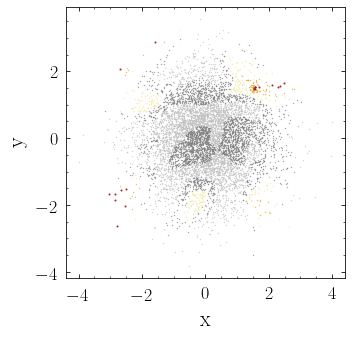

In [37]:
from importlib import reload
import cwola_utils_copy
reload(cwola_utils_copy)
del(model_ensemble)
from cwola_utils_copy import model_ensemble
from cwola_utils_copy import check_eff

output_prefix = 'testing'
myargs['-kfold']=4
kfolds = 4
myargs['-checkeff']=0.005
eff_for_thresh=0.005
myargs['-patience'] = 600
ntries = 1

bin_i=16
axes_list=[[0,1]]
axes_labels=[['x','y']]
preprocess=None
numvars=2
batch_size=2000


rates = np.array([0.5,0.95,0.99,0.998]),
colors=['silver','grey','khaki','goldenrod','firebrick']

times = list()


myargs['-checkeff']

model_utils = model_ensemble(bg_plus_signal_binned, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = eff_for_thresh)
for k in range(myargs['-kfold']):
    print('Starting kfold', k, 'of', kfolds-1)
    #Loop over validation sets
    for l in range(myargs['-kfold']):
        if l == k:
            continue
        print('Starting lfold', l, 'of', kfolds-1)

        data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

        for i in range(ntries):
            print(" k =", k, "l =", l)
            #Naming convention for model files.
            checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
            start = time.time()


            print("Now training model ", i + 1, " of ", ntries)

            K.clear_session()
            #Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
            myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

            #Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
            my_check_eff = cwola_utils_copy.check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = myargs['-patience'],
                                     min_epoch=50, batch_size=batch_size,
                                     plot_period=50,eff_rate=myargs['-checkeff'],
                                     plotmode="print",avg_length=20)
            #Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
            my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                                axes_list = axes_list,
                                                axes_labels = axes_labels,
                                                period=50,
                                                training_data=np.append(data_train,data_valid,axis=0),
                                                training_labels=np.append(labels_train,labels_valid,axis=0),
                                                preprocess=preprocess,
                                                rates=rates,
                                                colors=colors)

            mycallbacks=[#my_print,
                my_check_eff]

            #Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
            #However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
            model = Sequential()
            model.add(Dense(64, input_dim=numvars,use_bias=True,
                            #activation='relu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
            model.add(keras.layers.LeakyReLU(alpha=0.01))
            #model.add(Activation('tanh'))
            #model.add(Dropout(0.1))
            model.add(Dense(64, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(32, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(16, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(8, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=myoptimizer,
                          loss='binary_crossentropy')

            model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                                   validation_data=(data_valid, labels_valid, weights_valid),
                                   callbacks=mycallbacks,verbose=0,
                                   sample_weight = weights_train)

            del model
            K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


            model = keras.models.load_model(checkpoint_name + "_best.h5")
            model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
            plt.close('all')
            


            print("Selected Model:")
            model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                                        rates=rates,
                                                                        colors=colors)

            for i in range(5):
                gc.collect()
            end = time.time()

            times.append(end-start)
            print("Elapsed Time = ", times[-1])
            sys.stdout.flush()

    print("Bin = ", bin_i)
    print("aucs valid: ", model_utils.aucs_valid)
    print("Effs valid: ", model_utils.effs_valid)
    print("aucs train: ", model_utils.aucs_train)
    print("Effs train: ", model_utils.effs_train)
    print("\n")

    #Make an ensemble model 7using the average of the best models trained using the (k-1) training-validation splits. Save this as a single model.
    ensemble_model = model_utils.makeandsave_ensemble_model(k,output_prefix + "_" + str(bin_i) + "_ensemble_k" + str(k) + ".h5")
    plt.close('all')
    
    print("Ensemble model for k =", k)
    model_utils.print_scatter_avg_onek_signalplussidebandregion(k,axes_list=axes_list,axes_labels=axes_labels,
                                                                   rates=rates,
                                                                   colors=colors)
    del ensemble_model
    K.clear_session()
    sys.stdout.flush()



Show full cross-validated NN selection

/home/Jack/.virtualenvs/Keras/lib/python3.4/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


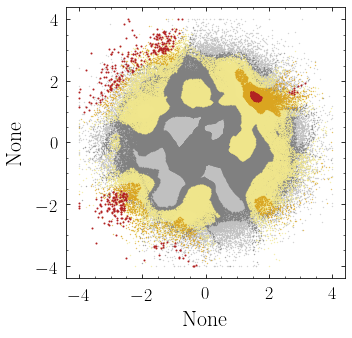

[array([0.5  , 0.9  , 0.99 , 0.999])]

In [38]:
model_utils.load_all_ensemble_models()

kset_data, kset_prediction = model_utils.avg_model_predict_kset()
plt.close('all')

AddPredictionsToScatter_nestedcrossval(kset_data,kset_prediction,axes_list = axes_list,
                                        rates = np.array([0.5,0.9,0.99,0.999]),
                                        colors=['silver','grey','khaki','goldenrod','firebrick'])

Do p-value calculation

In [39]:
bin_widths_GeV = bin_widths*1000
bin_boundaries_GeV = bin_boundaries*1000

In [40]:
from importlib import reload  # Python 3.4+ only.
import cwola_utils_copy
from cwola_utils_copy import get_p_value

key=18


chosen_effs = [1.0,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005]

ymin=1E8
ymax=0
plt.close('all')

file = open(output_prefix + '_' + str(bin_i) +  '_bincounts.dat','w')
bincutcountslist = []

for eff in chosen_effs:
    print("Setting eff to ", eff)
    bincutcounts, bincutcountsset = model_utils.get_bin_cut_counts_all(eff)
    bindensities = bincutcounts / bin_widths_GeV
    print("Counts after cut: ", bincutcounts)
    #print("St. Dev. after cut: ", binstd)
    file.write(str(eff))
    file.write('\t')
    for entry in bincutcounts:
        file.write(str(entry))
        file.write('\t')
    file.write('\n')
    bincutcountslist.append(bincutcounts)



file.close()


Setting eff to  1.0
Counts after cut:  [147204 125118 106362  89200  76470  64470  54559  46070  39098  32675
  27788  23018  19957  16265  13793  11852   9856   8136   6822   5660
   4815   4037   3295   2696   2273   1893   1594   1260   1044    848
    713    618    455    408    357    273    218    181    134]
Setting eff to  0.1
Counts after cut:  [14685 12470 10535  9004  7645  6506  5527  4476  4049  3283  2742  2304
  1966  1581  1367  1156   995   860   707   586   500   428   364   267
   193   175   142   122    95    60    62    66    53    48    31    31
    33    15    17]
Setting eff to  0.05
Counts after cut:  [7380 6204 5275 4483 3791 3240 2764 2211 2041 1625 1316 1154  998  782
  688  602  543  446  356  300  258  214  172  155   98   77   64   66
   52   36   31   36   27   26   14   10   15   11   11]
Setting eff to  0.02
Counts after cut:  [2937 2451 2080 1726 1534 1338 1101  873  792  626  530  447  401  321
  296  272  277  196  158  120  106   86   65   70   50

Getting p-value for eff: 1.0
fit params:  [1.59935348 4.97801807 7.00647231]


Goodness:  KstestResult(statistic=0.08013476114990314, pvalue=0.9749124642457182)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([15.93397449])), ('fun', -0.14342505304375663), ('status', 0), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 18), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([ 0.01164153, -0.00582077])), ('x', array([81.95311837, 82.94311837])), ('fun', -0.6774700910318643), ('status', 0), ('nit', 3), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('nfev', 78), ('success', True)]) 

z =  1.0437298062506823
p0 =  0.1483052077694278


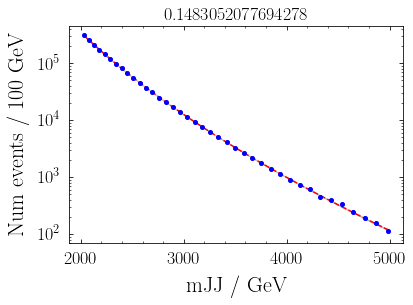

Getting p-value for eff: 0.1
fit params:  [0.25525602 5.74926718 6.82385125]


Goodness:  KstestResult(statistic=0.15181230655807165, pvalue=0.34435552788820933)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([9.96918165])), ('fun', -0.10776211773554678), ('status', 0), ('nit', 5), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 12), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([-2.00565743e-02,  6.37860868e+01])), ('fun', -0.674311675811623), ('status', 0), ('nit', 6), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 30), ('success', True)]) 

z =  1.0844089956614642
p0 =  0.13909174847891237


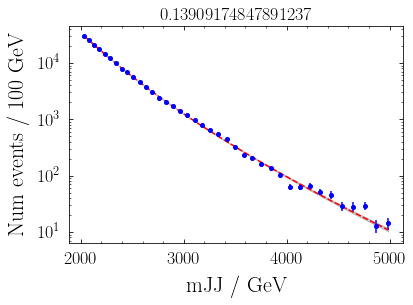

Getting p-value for eff: 0.05
fit params:  [0.07764973 4.95809378 7.0193855 ]


Goodness:  KstestResult(statistic=0.13803617642878618, pvalue=0.463789840067903)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([18.73099003])), ('fun', -0.7774059044004389), ('status', 0), ('nit', 5), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 42), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([-1.22339128e-02,  1.22288291e+02])), ('fun', -4.87032225040457), ('status', 0), ('nit', 7), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 33), ('success', True)]) 

z =  2.8896226334250374
p0 =  0.001928522660691212


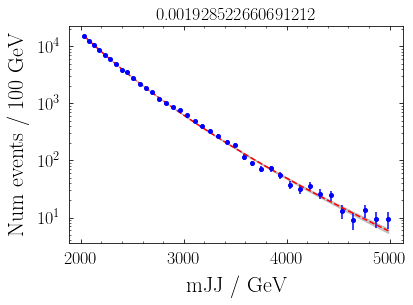

Getting p-value for eff: 0.02
fit params:  [0.12986995 7.19578017 6.44401077]


Goodness:  KstestResult(statistic=0.1638364504165587, pvalue=0.25952896903291833)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([23.97312369])), ('fun', -3.185618481425081), ('status', 0), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 8), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([4.19618330e-03, 1.56882422e+02])), ('fun', -19.019793038166426), ('status', 0), ('nit', 6), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 24), ('success', True)]) 

z =  5.674018688930457
p0 =  6.974295252426543e-09


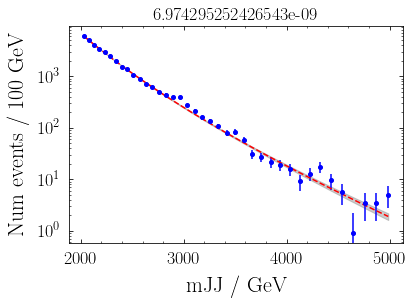

Getting p-value for eff: 0.01
fit params:  [0.03274175 6.09186916 6.70856613]


Goodness:  KstestResult(statistic=0.10899050544494626, pvalue=0.79312688683535)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([21.46357206])), ('fun', -5.237398652529919), ('status', 0), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 10), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([-5.32240310e-05,  1.43316501e+02])), ('fun', -30.04878692823968), ('status', 0), ('nit', 10), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 78), ('success', True)]) 

z =  7.112694957071834
p0 =  5.689893001203927e-13


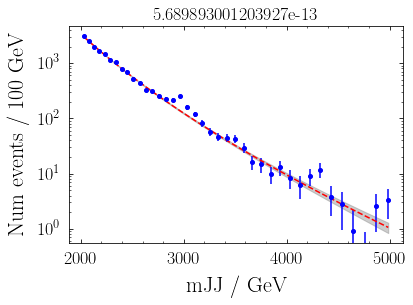

Getting p-value for eff: 0.005
fit params:  [0.02476314 7.28657262 6.5987822 ]


Goodness:  KstestResult(statistic=0.1621015071641032, pvalue=0.27069642249439574)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0.])), ('x', array([18.34244884])), ('fun', -8.366091789918755), ('status', 0), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 10), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([-3.17975767e-04,  1.27245413e+02])), ('fun', -45.20237221886464), ('status', 0), ('nit', 9), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 36), ('success', True)]) 

z =  8.688338274579129
p0 =  0.0


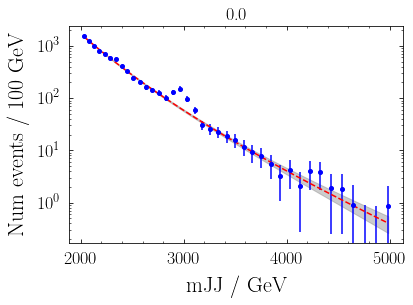

Getting p-value for eff: 0.002
fit params:  [0.01396921 8.14696773 6.48010167]


Goodness:  KstestResult(statistic=0.20886273099841834, pvalue=0.0742902569535715)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([1.70530257e-05])), ('x', array([12.25558393])), ('fun', -9.936208550998174), ('status', 0), ('nit', 5), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('nfev', 12), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([0., 0.])), ('x', array([-5.96487472e-05,  8.67930274e+01])), ('fun', -47.669485610545394), ('status', 0), ('nit', 9), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 33), ('success', True)]) 

z =  8.87169060229556
p0 =  0.0


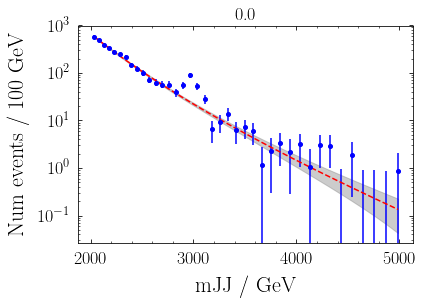

Getting p-value for eff: 0.001
fit params:  [ 0.94077292 17.29505778  4.67572413]


Goodness:  KstestResult(statistic=0.20303709754157567, pvalue=0.08885720335519598)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([-2.84217094e-06])), ('x', array([8.26210413])), ('fun', -8.448408895514547), ('status', 0), ('nit', 5), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 12), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([-2.84217094e-06,  0.00000000e+00])), ('x', array([-1.25349520e-05,  4.90738511e+01])), ('fun', -31.22817959384753), ('status', 0), ('nit', 10), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 33), ('success', True)]) 

z =  7.047135802623033
p0 =  9.131584377541913e-13


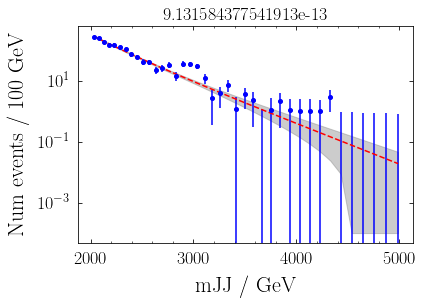

Getting p-value for eff: 0.0005
fit params:  [0.01083382 9.07777767 5.9088871 ]


Goodness:  KstestResult(statistic=0.1611254966750517, pvalue=0.2771342363813465)


numerator:  dict_items([('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('jac', array([-4.26325641e-06])), ('x', array([3.40662959])), ('fun', -2.4426171934762095), ('status', 0), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 10), ('success', True)]) 

Denominator:  dict_items([('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('jac', array([7.10542736e-06, 4.26325641e-06])), ('x', array([1.02015189e-05, 2.03357561e+01])), ('fun', -9.243239037175528), ('status', 0), ('nit', 8), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('nfev', 27), ('success', True)]) 

z =  4.046112209175188
p0 =  2.6037639234255394e-05


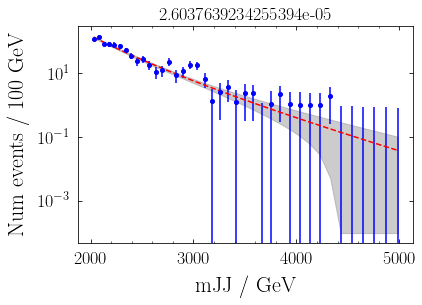

In [41]:
reload(cwola_utils_copy)
from cwola_utils_copy import get_p_value

for i, eff in enumerate(chosen_effs):
    print("Getting p-value for eff:", eff)

    pplotname = output_prefix + '_pplot_' + str(eff) + '.png'
    cwola_utils_copy.get_p_value(bincutcountslist[i],bin_boundaries_GeV,mask=[bin_i-1,bin_i,bin_i+1],verbose=1,
                plotfile="show")